In [25]:
# Initial imports
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


## Gather and examine data ##

In [4]:
file_path = Path("../test_emily/MH_merged_cleaned.csv/")
MH_data = pd.read_csv(file_path)
MH_data.head()

,Unnamed: 0,Entity,Year,Schizophrenia Prevelance,Depression Prevalence,Anxiety Prevelance,Bipolar Prevalence,Eating Disorder Prevalence,DALYs- Depression,DALYs- Schizophrenia,DALYs- Bipolar,DALYs- Eating Disorder,DALYs- Anxiety
0,0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700,895.22565,138.24825,147.64412,26.471115,440.33000
1,1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256,893.88434,137.76122,147.56696,25.548681,439.47202
2,2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844,892.34973,137.08030,147.13086,24.637949,437.60718
3,3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089,891.51587,136.48602,146.78812,23.863169,436.69104
4,4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815,891.39160,136.18323,146.58481,23.189074,436.76800


In [14]:
#eliminate unnecessary column
MH_data=MH_data.drop(columns=["Unnamed: 0"])

In [15]:
MH_data.shape

(6150, 12)

In [16]:
#are any values missing?
MH_data.isnull().sum()/len(MH_data)*100

Entity                        0.0
Year                          0.0
Schizophrenia Prevelance      0.0
Depression Prevalence         0.0
Anxiety Prevelance            0.0
Bipolar Prevalence            0.0
Eating Disorder Prevalence    0.0
DALYs- Depression             0.0
DALYs- Schizophrenia          0.0
DALYs- Bipolar                0.0
DALYs- Eating Disorder        0.0
DALYs- Anxiety                0.0
dtype: float64

In [17]:
MH_data.describe()

,Year,Schizophrenia Prevelance,Depression Prevalence,Anxiety Prevelance,Bipolar Prevalence,Eating Disorder Prevalence,DALYs- Depression,DALYs- Schizophrenia,DALYs- Bipolar,DALYs- Eating Disorder,DALYs- Anxiety
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945,650.147720,170.168725,137.602358,41.622553,391.391882
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051,189.881727,25.574189,50.977136,29.615846,101.513141
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780,243.097840,119.913380,39.438133,9.671199,180.049640
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748,500.949597,154.312173,112.243175,20.541226,326.350750
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325,630.373350,174.697920,123.508730,30.762172,375.719120
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860,764.889150,183.565115,184.623580,51.641518,433.911575
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688,1427.423600,291.100100,325.152800,218.704390,814.302300


Exploratory Data Analysis

In [21]:
#What is the existing correlation between the columns/"features"
corr_mh = MH_data.corr(method='pearson')
corr_mh

,Year,Schizophrenia Prevelance,Depression Prevalence,Anxiety Prevelance,Bipolar Prevalence,Eating Disorder Prevalence,DALYs- Depression,DALYs- Schizophrenia,DALYs- Bipolar,DALYs- Eating Disorder,DALYs- Anxiety
Year,1.000000,0.025681,-0.048366,0.028779,0.002705,0.075643,-0.048179,0.028852,0.004237,0.076611,0.031100
Schizophrenia Prevelance,0.025681,1.000000,-0.472859,0.294208,0.117661,0.495563,-0.427086,0.998577,0.123450,0.496687,0.300722
Depression Prevalence,-0.048366,-0.472859,1.000000,0.120388,0.154509,-0.046099,0.992993,-0.498305,0.143959,-0.051787,0.109564
Anxiety Prevelance,0.028779,0.294208,0.120388,1.000000,0.569075,0.586784,0.161419,0.274795,0.564549,0.584395,0.999711
Bipolar Prevalence,0.002705,0.117661,0.154509,0.569075,1.000000,0.674967,0.241766,0.106671,0.999831,0.672464,0.572736
Eating Disorder Prevalence,0.075643,0.495563,-0.046099,0.586784,0.674967,1.000000,0.018313,0.481960,0.673835,0.999904,0.592746
DALYs- Depression,-0.048179,-0.427086,0.992993,0.161419,0.241766,0.018313,1.000000,-0.452330,0.231960,0.012685,0.151601
DALYs- Schizophrenia,0.028852,0.998577,-0.498305,0.274795,0.106671,0.481960,-0.452330,1.000000,0.113266,0.483376,0.282294
DALYs- Bipolar,0.004237,0.123450,0.143959,0.564549,0.999831,0.673835,0.231960,0.113266,1.000000,0.671413,0.568551
DALYs- Eating Disorder,0.076611,0.496687,-0.051787,0.584395,0.672464,0.999904,0.012685,0.483376,0.671413,1.000000,0.590471


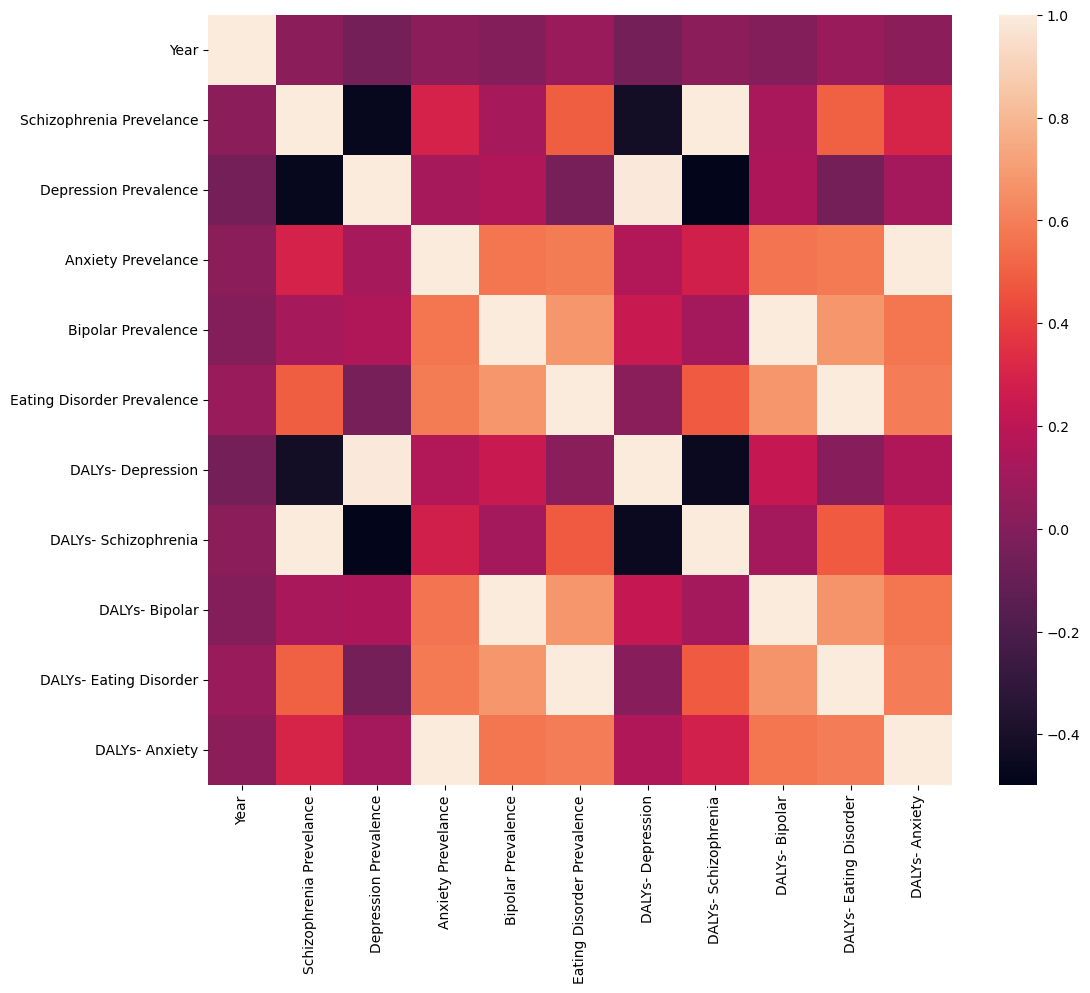

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_mh)
plt.show()
#viewing correlations between various disease states

In [41]:
#With consideration of eating disorders only considered as the target variable, which variables are most strong correlated with it
corr_target= MH_data.corr()['Eating Disorder Prevalence'].abs()
corr_target.sort_values(ascending=True)

DALYs- Depression             0.018313
Depression Prevalence         0.046099
Year                          0.075643
DALYs- Schizophrenia          0.481960
Schizophrenia Prevelance      0.495563
Anxiety Prevelance            0.586784
DALYs- Anxiety                0.592746
DALYs- Bipolar                0.673835
Bipolar Prevalence            0.674967
DALYs- Eating Disorder        0.999904
Eating Disorder Prevalence    1.000000
Name: Eating Disorder Prevalence, dtype: float64

<AxesSubplot:>

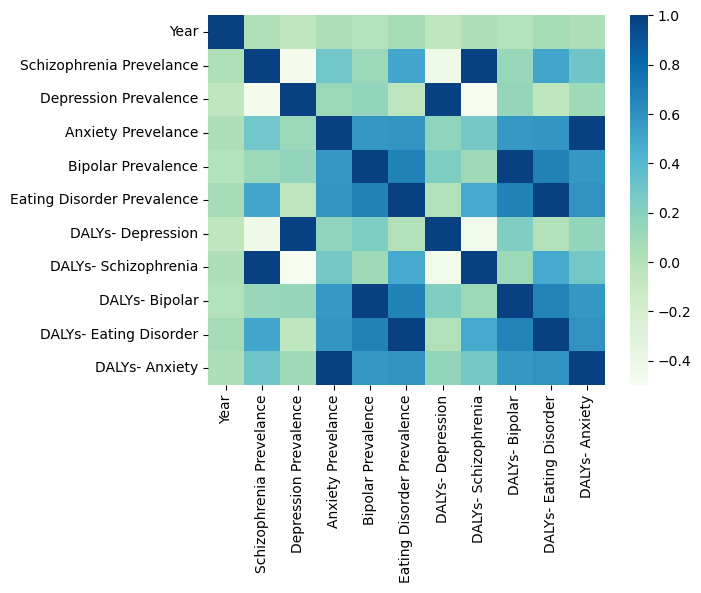

In [49]:
plt.figure
sns.heatmap(corr_mh, cmap='GnBu')

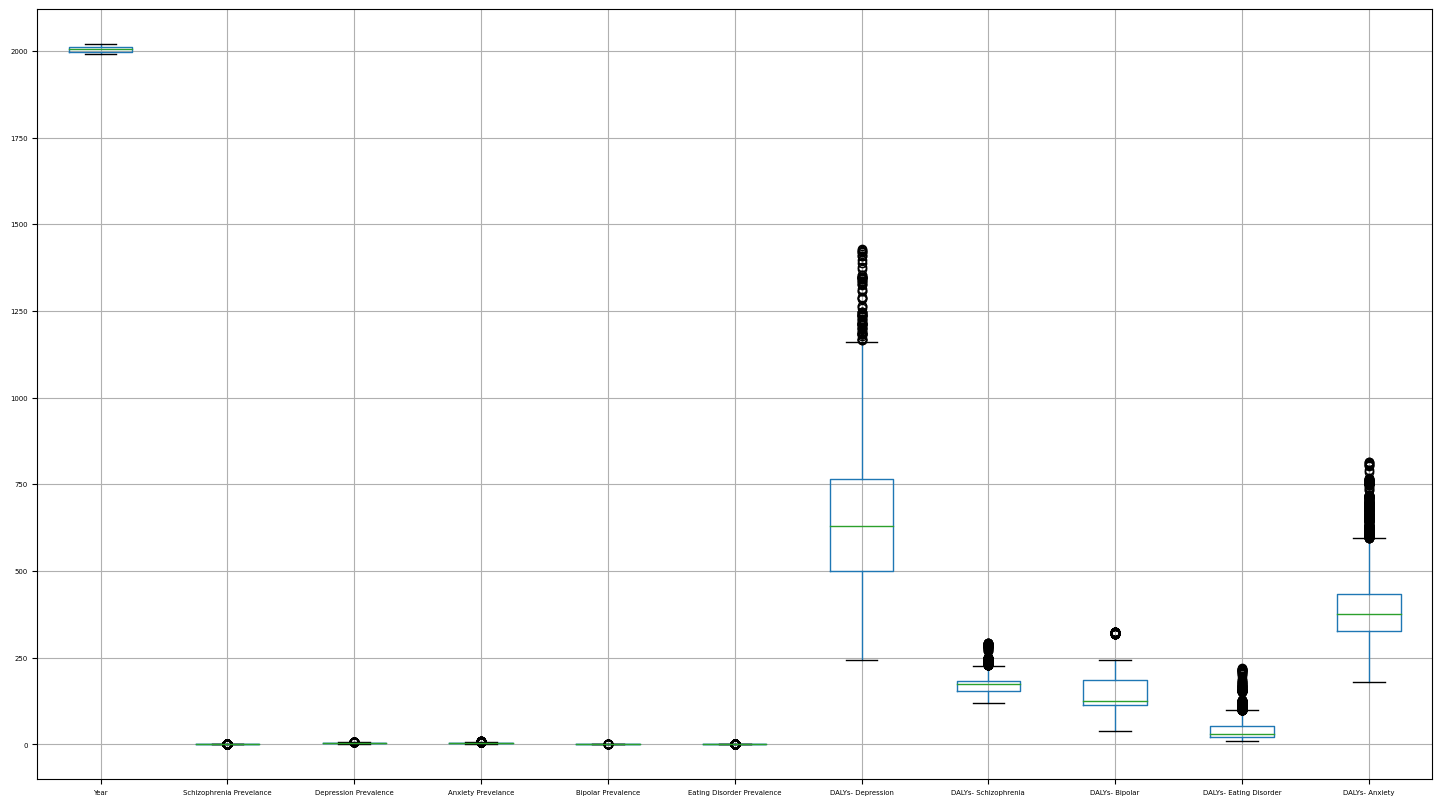

In [61]:
#Identifying Outliers 
MH_data.boxplot(grid=True,fontsize=5, figsize=(18,10))
plt.show()
savefig

## Prepare Data for Machine Learning Algorithms ##

#### To be completed later indenpendently. Focused efforts on completing AI models using survey data_set 